In [1]:
import pandas as pd
credits = pd.read_csv('credits.csv')
titles = pd.read_csv('titles.csv')

In [2]:
print(titles.shape)
titles.head(2)

(1854, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500


In [3]:
credits.head()

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


In [4]:
set(credits.role)

{'ACTOR', 'DIRECTOR'}

In [5]:
director = credits[credits['role'] == 'DIRECTOR']

In [6]:
director = director[['id','name']]

In [7]:
director

,id,name
65,tm89464,George Seaton
79,tm61729,James Algar
80,tm61729,Clyde Geronimi
81,tm61729,Jack Kinney
105,tm61052,Wilfred Jackson
...,...,...
30674,tm1314337,Brendan Walter
30675,tm1314337,Jacob Bixenman
30680,tm1299578,William Pinkney III
30687,tm1075680,Kevin Bachar


In [8]:
#create colume of all actors in each movie id
director2 = director.groupby('id').agg({'name':lambda x: list(x)})

In [9]:
director2 = director.groupby(['id'], as_index=False)
director3 = director2.agg({'name':lambda x: list(x)})

In [10]:
director3

,id,name
0,tm1,[George Lucas]
1,tm100013,[Robert Vince]
2,tm1001876,[Scott Bateman]
3,tm1002567,[Elizabeth Allen Rosenbaum]
4,tm1002614,[Mark Davis]
...,...,...
1286,ts81805,[Stephen Mizelas]
1287,ts81977,[Matt Danner]
1288,ts82077,[Nadège Laici]
1289,ts83336,[Eric Beaufils]


In [11]:
#check

check_df = director3[director3['id'] == 'tm61729']  
check_df

,id,name
934,tm61729,"[James Algar, Clyde Geronimi, Jack Kinney]"


In [13]:
director3.shape

(1291, 2)

In [14]:
merged = titles.merge(director3, on='id', how='left')

In [15]:
merged = merged.rename(columns={'name': 'director'})

In [17]:
merged.shape

(1854, 16)

In [18]:
merged['id'].is_unique

True

In [19]:
merged.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
director                 object
dtype: object

In [20]:
merged.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388,[George Seaton]


In [21]:
merged.isna().sum()

id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
director                 563
dtype: int64

In [26]:
#replace director Nan with
merged['director'] = merged['director'].fillna('')

In [27]:
merged.isna().sum()

id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
director                   0
dtype: int64

In [29]:
#see if NA value are from movie
print(merged.groupby(['type']).size())

print("All Movies have a seasons type of NA:")
print(merged.groupby(['type', 'seasons']).size())


type
MOVIE    1314
SHOW      540
dtype: int64
All Movies have a seasons type of NA:
type  seasons
SHOW  1.0        251
      2.0        103
      3.0         82
      4.0         38
      5.0         21
      6.0         14
      7.0          9
      8.0          7
      9.0          3
      10.0         3
      11.0         1
      12.0         1
      13.0         1
      14.0         1
      20.0         1
      22.0         1
      32.0         1
      34.0         1
      36.0         1
dtype: int64

All movies have NA Value - 1475 movies, 1475 NA value for seasons:


type
MOVIE    1314
SHOW      540
dtype: int64

In [30]:
#replace NA with zero for Movies & shows missing
merged['seasons'].fillna(0, inplace=True)

#check
merged.isna().sum()

id                        0
title                     0
type                      0
description               9
release_year              0
age_certification       451
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 478
imdb_score              515
imdb_votes              526
tmdb_popularity          15
tmdb_score              146
director                  0
dtype: int64

In [31]:
#see more detail on null age_certification
merged[merged['age_certification'].isna()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
7,tm165060,The Tortoise and the Hare,MOVIE,The Tortoise and the Hare is an animated short...,1935,NaN,9,"['animation', 'documentation']",['US'],0.0,NaN,NaN,NaN,9.286,6.686,[Wilfred Jackson]
9,tm67239,Lonesome Ghosts,MOVIE,"On a dark and stormy night, four bored ghosts ...",1937,NaN,9,['comedy'],['US'],0.0,NaN,NaN,NaN,5.929,6.733,[Burt Gillett]
10,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,NaN,96,"['family', 'action']","['GB', 'US']",0.0,tt0043067,6.9,8772.0,8.872,6.500,[Byron Haskin]
12,tm87968,Early to Bed,MOVIE,"Donald has to get up early, but everything see...",1941,NaN,8,['animation'],['US'],0.0,NaN,NaN,NaN,4.764,6.713,[Jack King]
15,tm77407,Saludos Amigos,MOVIE,Live-action segments show members of the Disne...,1943,NaN,41,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,tt0036326,6.1,6506.0,17.765,5.876,"[William Roberts, Norman Ferguson, Jack Kinney..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,ts313654,The Low Tone Club,SHOW,Amaranto Molina is a peculiar professor. With ...,2023,NaN,32,"['comedy', 'drama', 'music']",['CO'],1.0,tt15559540,8.3,76.0,24.965,10.000,
1837,tm1298257,Schoolhouse Rock! 50th Anniversary Singalong,MOVIE,Dust off your dictionaries and grab that hairb...,2023,NaN,40,"['comedy', 'family', 'history', 'music']",['US'],0.0,tt26231144,4.5,70.0,3.767,2.000,"[Lauren Quinn, Nick Florez, R.J. Durell]"
1844,ts300548,@Gina Yei: #WithAllMyHeartAndMore,SHOW,Yei!— Is what Gina says in positive situations...,2023,NaN,43,"['drama', 'comedy']",['PR'],1.0,tt15539452,8.3,84.0,40.633,7.000,
1846,ts378918,Voices Rising: The Music of Wakanda Forever,SHOW,A new documentary series focusing on the music...,2023,NaN,31,"['documentation', 'music']",['US'],1.0,tt26345409,7.2,30.0,10.123,NaN,


In [32]:
#replace NA with unrated for age_certification
merged['age_certification'].fillna('unrated', inplace=True)

#check
merged.isna().sum()

id                        0
title                     0
type                      0
description               9
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 478
imdb_score              515
imdb_votes              526
tmdb_popularity          15
tmdb_score              146
director                  0
dtype: int64

In [33]:
#drop imdb since almost 30% is missing - will use tmdb instead

merged.drop('imdb_id', axis=1, inplace=True)
merged.drop('imdb_score', axis=1, inplace=True)
merged.drop('imdb_votes', axis=1, inplace=True)
merged.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,23.515,7.388,[George Seaton]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]"
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,93.547,7.035,"[Wilfred Jackson, Hamilton Luske, Clyde Geronimi]"
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],0.0,54.265,6.999,"[Ben Sharpsteen, Jack Kinney, William Roberts,..."
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],0.0,43.609,7.382,"[Paul Satterfield, Hamilton Luske, Jim Handley..."


In [ ]:
#I do age and genre

In [ ]:
#Genre

In [34]:
#remove square brackets, quotations and spaces from genres

merged['genres'] = pd.DataFrame([str(line).strip('[').strip(']') for line in merged['genres']])
merged['genres'] = merged['genres'].str.replace(r"'", r"")
merged['genres'] = merged['genres'].str.replace(r" ", r"")
merged.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton]
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]"


In [35]:
#get dummies for genres

dummies = merged['genres'].str.get_dummies(sep=',')
dummies.head(5)

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


In [36]:
#concatenate dummies with genres back into merged
merged2 = (pd.concat([merged, dummies], axis=1).drop(["genres"], axis=1))
print(merged2.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'production_countries', 'seasons',
       'tmdb_popularity', 'tmdb_score', 'director', 'action', 'animation',
       'comedy', 'crime', 'documentation', 'drama', 'european', 'family',
       'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi',
       'sport', 'thriller', 'war', 'western'],
      dtype='object')


In [37]:
#get dummies for age_certification

dummies2 = merged['age_certification'].str.get_dummies(sep=',')
dummies2.head(5)

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,unrated
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#get count by age_certification

dummies2_sum = merged['age_certification'].str.get_dummies(sep=',').sum()
dummies2_sum

G           414
PG          413
PG-13       126
R             5
TV-14        87
TV-G         93
TV-MA         8
TV-PG       134
TV-Y         51
TV-Y7        69
TV-Y7-FV      3
unrated     451
dtype: int64

In [39]:
#concatenate dummies2 with age_certification back into merged2
merged3 = (pd.concat([merged2, dummies2], axis=1).drop(["age_certification"], axis=1))
print(merged3.columns)

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'production_countries', 'seasons', 'tmdb_popularity', 'tmdb_score',
       'director', 'action', 'animation', 'comedy', 'crime', 'documentation',
       'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-Y7', 'TV-Y7-FV', 'unrated'],
      dtype='object')


In [40]:
#remove quotation marks and brackets from country from genres
merged3['production_countries'] = pd.DataFrame([str(line).strip('[').strip(']') for line in merged3['production_countries']])
merged3['production_countries'] = merged3['production_countries'].str.replace(r"'", r"")
merged3['production_countries'] = merged3['production_countries'].str.replace(r" ", r"")
merged3.head(2)

,id,title,type,description,release_year,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,unrated
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,US,0.0,23.515,7.388,...,0,0,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,US,0.0,16.194,6.500,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#get dummies for production_countries

dummies3 = merged3['production_countries'].str.get_dummies(sep=',')
dummies3.columns

Index(['AE', 'AR', 'AT', 'AU', 'BE', 'BR', 'BW', 'CA', 'CH', 'CI', 'CL', 'CN',
       'CO', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GB', 'GR', 'GT', 'HK', 'IE', 'IN',
       'IT', 'JP', 'KI', 'KR', 'MC', 'MX', 'NL', 'NO', 'NZ', 'PH', 'PL', 'PR',
       'SE', 'SI', 'SK', 'TR', 'TW', 'UG', 'US', 'ZA'],
      dtype='object')

In [42]:
#get count by production_countries

dummies3_sum = merged3['production_countries'].str.get_dummies(sep=',').sum()
dummies3_sum

AE       1
AR      10
AT       2
AU      25
BE       2
BR       7
BW       1
CA      66
CH       1
CI       1
CL       1
CN       8
CO       4
CZ       1
DE      15
DK       4
ES       6
FR      29
GB      99
GR       1
GT       1
HK       1
IE       1
IN       8
IT       6
JP      10
KI       1
KR       7
MC       1
MX       3
NL       1
NO       1
NZ       6
PH       2
PL       1
PR       1
SE       1
SI       1
SK       1
TR       1
TW       1
UG       1
US    1657
ZA       2
dtype: int64

In [43]:
dummies3.head()

,AE,AR,AT,AU,BE,BR,BW,CA,CH,CI,...,PL,PR,SE,SI,SK,TR,TW,UG,US,ZA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
#get dummies for Type

dummies4 = merged3['type'].str.get_dummies(sep=',')
dummies4.columns

Index(['MOVIE', 'SHOW'], dtype='object')

In [45]:
#get count by type

dummies4_sum = merged3['type'].str.get_dummies(sep=',').sum()
dummies4_sum

MOVIE    1314
SHOW      540
dtype: int64

In [46]:
#concatenate dummies4 with type back into merged3
merged4 = (pd.concat([merged3, dummies4], axis=1).drop(["type"], axis=1))
print(merged4.columns)

Index(['id', 'title', 'description', 'release_year', 'runtime',
       'production_countries', 'seasons', 'tmdb_popularity', 'tmdb_score',
       'director', 'action', 'animation', 'comedy', 'crime', 'documentation',
       'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-Y7', 'TV-Y7-FV', 'unrated', 'MOVIE', 'SHOW'],
      dtype='object')


In [47]:
#check for NA

#check
merged4.isna().sum()

id                        0
title                     0
description               9
release_year              0
runtime                   0
production_countries      0
seasons                   0
tmdb_popularity          15
tmdb_score              146
director                  0
action                    0
animation                 0
comedy                    0
crime                     0
documentation             0
drama                     0
european                  0
family                    0
fantasy                   0
history                   0
horror                    0
music                     0
reality                   0
romance                   0
scifi                     0
sport                     0
thriller                  0
war                       0
western                   0
G                         0
PG                        0
PG-13                     0
R                         0
TV-14                     0
TV-G                      0
TV-MA               

In [48]:
#add in decades based on release_year

In [49]:
merged4['decade'] = merged4['release_year']//10*10 
merged4.head(2)

,id,title,description,release_year,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,...,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,unrated,MOVIE,SHOW,decade
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,US,0.0,23.515,7.388,[George Seaton],...,0,0,0,0,0,0,0,1,0,1940
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,1950,68,US,0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",...,0,0,0,0,0,0,0,1,0,1950


In [50]:
merged4.dtypes

id                       object
title                    object
description              object
release_year              int64
runtime                   int64
production_countries     object
seasons                 float64
tmdb_popularity         float64
tmdb_score              float64
director                 object
action                    int64
animation                 int64
comedy                    int64
crime                     int64
documentation             int64
drama                     int64
european                  int64
family                    int64
fantasy                   int64
history                   int64
horror                    int64
music                     int64
reality                   int64
romance                   int64
scifi                     int64
sport                     int64
thriller                  int64
war                       int64
western                   int64
G                         int64
PG                        int64
PG-13   

In [51]:
#get dummies for Decade

merged4['decade'] = merged4.decade.astype(str)

dummies5 = merged4['decade'].str.get_dummies(sep=',')
dummies5.columns

Index(['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000',
       '2010', '2020'],
      dtype='object')

In [52]:
#concatenate dummies5 with type back into merged4
merged5 = (pd.concat([merged4, dummies5], axis=1).drop(["decade"], axis=1))
print(merged5.columns)

Index(['id', 'title', 'description', 'release_year', 'runtime',
       'production_countries', 'seasons', 'tmdb_popularity', 'tmdb_score',
       'director', 'action', 'animation', 'comedy', 'crime', 'documentation',
       'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-Y7', 'TV-Y7-FV', 'unrated', 'MOVIE', 'SHOW', '1920', '1930', '1940',
       '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'],
      dtype='object')


In [53]:
#drop release_year

clean = merged5.drop(['release_year'], axis=1)
clean.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",96,US,0.0,23.515,7.388,[George Seaton],0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,68,US,0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
#remove square brackets, quotations and spaces from director

clean['director'] = pd.DataFrame([str(line).strip('[').strip(']') for line in clean['director']])
clean['director'] = clean['director'].str.replace(r"'", r"")
clean['director'] = clean['director'].str.replace(r" ", r"")
clean.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",96,US,0.0,23.515,7.388,GeorgeSeaton,0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,68,US,0.0,16.194,6.500,"JamesAlgar,ClydeGeronimi,JackKinney",0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
#feature seletion - popularity

#based on results below runtime should be normalized

In [56]:
#drop NA for tmdb score - drop whole row

selection = clean.dropna(subset = ['tmdb_score'])
selection.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",96,US,0.0,23.515,7.388,GeorgeSeaton,0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,68,US,0.0,16.194,6.500,"JamesAlgar,ClydeGeronimi,JackKinney",0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
#Originally ran without normalizing run time - based on results runtime should be normalized

In [58]:
selection.columns

Index(['id', 'title', 'description', 'runtime', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV',
       'unrated', 'MOVIE', 'SHOW', '1920', '1930', '1940', '1950', '1960',
       '1970', '1980', '1990', '2000', '2010', '2020'],
      dtype='object')

In [59]:
#check with normalized run time

In [60]:
#normalize runtime

import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import numpy as np
  
# copy the data
normalized = selection.copy()
  
# apply normalization techniques
column = 'runtime'
normalized[column] = MinMaxScaler().fit_transform(np.array(normalized[column]).reshape(-1,1))
  
# view normalized data  
normalized.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",0.524862,US,0.0,23.515,7.388,GeorgeSeaton,0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,0.370166,US,0.0,16.194,6.500,"JamesAlgar,ClydeGeronimi,JackKinney",0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
# Variable selection with k best using f_regression for popularity

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

X = normalized[['runtime',
       'seasons','tmdb_score','action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'unrated', 'MOVIE', 'SHOW',
       '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000',
       '2010', '2020']]

y = normalized['tmdb_popularity'].astype('int')


#apply SelectKBest class to extract topfeatures
bestfeatures = SelectKBest(score_func= chi2, k=35)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Popularity_Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Popularity_Score'))  #print all best features

         Features  Popularity_Score
1         seasons       2846.548043
25              R        606.168085
24          PG-13        438.995592
7   documentation        374.569693
3          action        366.490438
11        fantasy        362.947374
17          scifi        342.962804
31        unrated        327.329318
19       thriller        313.057327
13         horror        306.297720
26          TV-14        267.438077
5          comedy        263.053322
16        romance        240.217231
20            war        230.850104
10         family        227.279954
4       animation        225.421014
8           drama        222.646615
6           crime        221.021012
42           2000        201.707265
30          TV-Y7        195.328903
44           2020        187.443623
9        european        185.307003
41           1990        173.803851
23             PG        171.808415
27           TV-G        159.401181
14          music        158.560068
40           1980        148

In [62]:
# Look at p-values

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
#original

x=normalized[['runtime',
       'seasons','tmdb_score','action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'unrated', 'MOVIE', 'SHOW',
       '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000',
       '2010', '2020']]

y = normalized['tmdb_popularity'].astype('int')


X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     6.837
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.05e-34
Time:                        11:53:36   Log-Likelihood:                -9815.7
No. Observations:                1708   AIC:                         1.972e+04
Df Residuals:                    1665   BIC:                         1.995e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.2268     19.122     -0.535      0.593     -47.732      27.278
runtime          55.1194     13.687      4.027      0.000      28.273      81.965
seasons           5.1567      1.079      4.780      0.000       3.041       7.273
tmdb_score        5.5383      1.720      3.220      0.001       2.165       8.912
action           15.1437      5.774      2.623      0.009       3.818      26.469
animation        13.0152      5.284      2.463      0.014       2.651      23.379
comedy            8.4043      4.808      1.748      0.081      -1.026      17.835
crime           -15.5341     10.650     -1.459      0.145     -36.423       5.355
documentation   -17.4785      5.920     -2.952      0.003     -29.090      -5.867
drama             7.5682      4.935      1.534      0.125      -2.112      17.248
european         -8.1965     12.756     -0.643      0.521     -33.216      16.823
family          -12.0818      5.567     -2.170      0.030     -23.002      -1.162
fantasy          20.9352      5.224      4.008      0.000      10.690      31.181
history          -7.6729     11.860     -0.647      0.518     -30.935      15.589
horror          -14.7716     13.591     -1.087      0.277     -41.428      11.885
music            -3.0882      7.639     -0.404      0.686     -18.070      11.894
romance           0.5580      6.901      0.081      0.936     -12.978      14.094
scifi            14.6677      6.149      2.385      0.017       2.607      26.729
sport            -6.7361      9.741     -0.692      0.489     -25.843      12.370
thriller         24.1469     10.266      2.352      0.019       4.012      44.282
war              -6.1423     26.402     -0.233      0.816     -57.927      45.642
western          -4.5207     15.967     -0.283      0.777     -35.838      26.797
G               -36.6067     28.922     -1.266      0.206     -93.335      20.121
PG              -35.8766     28.778     -1.247      0.213     -92.321      20.568
PG-13            -9.5954     29.273     -0.328      0.743     -67.011      47.820
R               -31.5437     45.053     -0.700      0.484    -119.910      56.823
TV-14           -18.0211     27.001     -0.667      0.505     -70.981      34.939
TV-G            -34.5912     27.451     -1.260      0.208     -88.433      19.251
TV-PG           -42.8815     26.707     -1.606      0.109     -95.265       9.502
TV-Y            -47.1162     28.688     -1.642      0.101    -103.384       9.152
TV-Y7           -49.5658     27.446     -1.806      0.071    -103.398       4.266
unrated         -33.5949     28.150     -1.193      0.233     -88.808      21.618
MOVIE            -1.5938     11.845     -0.135      0.893     -24.826      21.639
SHOW             -8.6330     10.791     -0.800      0.424     -29.798      12.532
1920              3.1555     70.476      0.045   

In [65]:
#remove until all < .05

x=normalized[['runtime',
       'tmdb_score',
       'animation', 'documentation',
       'family', 'fantasy',
       'scifi', 'thriller', 'PG-13', '2020']]

y = normalized['tmdb_popularity'].astype('int')


X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     22.65
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.01e-40
Time:                        11:53:36   Log-Likelihood:                -9844.6
No. Observations:                1708   AIC:                         1.971e+04
Df Residuals:                    1697   BIC:                         1.977e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -48.1854     12.246     -3.935      0.000     -72.203     -24.167
runtime          48.6090     10.578      4.595      0.000      27.861      69.357
tmdb_score        7.2850      1.638      4.448      0.000       4.073      10.497
animation         9.7882      4.933      1.984      0.047       0.112      19.464
documentation   -21.7130      5.232     -4.150      0.000     -31.975     -11.451
family          -11.6781      4.673     -2.499      0.013     -20.843      -2.513
fantasy          23.4868      5.059      4.643      0.000      13.565      33.409
scifi            21.3621      5.318      4.017      0.000      10.932      31.793
thriller         25.5886      9.517      2.689      0.007       6.922      44.255
PG-13            26.6438      8.382      3.179      0.002      10.204      43.084
2020             20.9760      4.569      4.590      0.000      12.014      29.938
==============================================================================
Omnibus:                     3480.316   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9398460.541
Skew:                          16.301   Prob(JB):                         0.00
Kurtosis:                     364.939   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#pull out just variable and p-value and sort
d = {}
for i in X.columns.tolist():
    d[f'{i}'] = model.pvalues[i].round(4)

pvalues = pd.DataFrame(d.items(), columns=['feature', 'pvalue']).sort_values(by = 'pvalue').reset_index(drop=True)

#reduce to only p-Value less than .05

features = pvalues[pvalues['pvalue'] < .05]
features

,feature,pvalue
0,runtime,0.0000
1,tmdb_score,0.0000
2,documentation,0.0000
3,fantasy,0.0000
4,2020,0.0000
5,const,0.0001
6,scifi,0.0001
7,PG-13,0.0015
8,thriller,0.0072
9,family,0.0125


In [67]:
#Divide the data set training and testing with a (70, 30) rule. 

from sklearn.model_selection import train_test_split

x=normalized[['runtime',
       'tmdb_score',
       'animation', 'documentation',
       'family', 'fantasy',
       'scifi', 'thriller', 'PG-13', '2020']]

y = normalized.tmdb_popularity

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=68)

In [68]:
#Linear Regression

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [69]:
RLR = LinearRegression().fit(x_train, y_train)
RLR_ytrain_pred = RLR.predict(x_train)
RLR_ytest_pred = RLR.predict(x_test)

In [70]:
#view head of training dataset
print('RLR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RLR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RLR Training Dataset: 



,ytrain,ytrainhat
0,1.906,14.510705
1,1.400,-21.125923
2,3.073,12.019568
3,50.517,42.675602
4,1.400,22.406928


In [71]:
#R-squared - % of variability explained in model

import sklearn.metrics as metrics


RLR_testr2_genre = metrics.r2_score(y_test, RLR_ytest_pred).round(6)
RLR_trainr2_genre = metrics.r2_score(y_train, RLR_ytrain_pred).round(6)
print("RLR train vs test R^2:",RLR_trainr2_genre, RLR_testr2_genre)

RLR train vs test R^2: 0.102756 0.106966


In [72]:
#RMSE - want lower

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_genre = sqrt(mean_squared_error(y_test, RLR_ytest_pred))
rmse_train_genre = sqrt(mean_squared_error(y_train, RLR_ytrain_pred))
print("RLR train vs test RMSE:",rmse_train_genre, rmse_test_genre)

RLR train vs test RMSE: 65.24037275701545 100.73394017952553


In [73]:
#feature seletion - Score

#based on outputs below both runtime and tmdb_popularity should be normalized

#

In [74]:
#normalize tmdb_popularity
  
# copy the data
normalized2 = normalized.copy()
  
# apply normalization techniques
column = 'tmdb_popularity'
normalized2[column] = MinMaxScaler().fit_transform(np.array(normalized2[column]).reshape(-1,1))
  
# view normalized data  
normalized2.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",0.524862,US,0.0,0.010615,7.388,GeorgeSeaton,0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,0.370166,US,0.0,0.007224,6.500,"JamesAlgar,ClydeGeronimi,JackKinney",0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
#look at p-value

In [76]:
#original

x=normalized2[['runtime',
       'seasons','tmdb_popularity','action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'unrated', 'MOVIE', 'SHOW',
       '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000',
       '2010', '2020']]

y = normalized2['tmdb_score'].astype('int')


X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tmdb_score   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     7.386
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.18e-38
Time:                        11:53:47   Log-Likelihood:                -2581.7
No. Observations:                1708   AIC:                             5249.
Df Residuals:                    1665   BIC:                             5483.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8819      0.257     15.113      0.000       3.378       4.386
runtime             0.2415      0.199      1.214      0.225      -0.149       0.632
seasons            -0.0129      0.016     -0.823      0.411      -0.044       0.018
tmdb_popularity     2.3586      0.763      3.090      0.002       0.861       3.856
action              0.0417      0.084      0.498      0.619      -0.123       0.206
animation           0.2926      0.076      3.844      0.000       0.143       0.442
comedy             -0.0495      0.070     -0.711      0.477      -0.186       0.087
crime              -0.1991      0.154     -1.291      0.197      -0.501       0.103
documentation       0.4282      0.085      5.022      0.000       0.261       0.595
drama               0.2564      0.071      3.603      0.000       0.117       0.396
european            0.0204      0.185      0.111      0.912      -0.342       0.383
family             -0.1311      0.081     -1.626      0.104      -0.289       0.027
fantasy             0.0440      0.076      0.579      0.563      -0.105       0.193
history             0.1264      0.172      0.736      0.462      -0.210       0.463
horror              0.1266      0.197      0.643      0.520      -0.259       0.512
music               0.2341      0.110      2.120      0.034       0.017       0.451
romance             0.1125      0.100      1.127      0.260      -0.083       0.308
scifi              -0.0131      0.089     -0.147      0.883      -0.188       0.162
sport               0.0201      0.141      0.143      0.886      -0.256       0.297
thriller            0.1942      0.149      1.306      0.192      -0.098       0.486
war                 0.0130      0.382      0.034      0.973      -0.737       0.763
western            -0.0188      0.231     -0.081      0.935      -0.472       0.435
G                   0.2368      0.419      0.566      0.572      -0.585       1.058
PG                  0.1090      0.417      0.262      0.794      -0.708       0.926
PG-13               0.2596      0.424      0.613      0.540      -0.571       1.091
R                   0.1303      0.652      0.200      0.842      -1.149       1.410
TV-14               0.3683      0.391      0.942      0.346      -0.398       1.135
TV-G                0.5364      0.397      1.350      0.177      -0.243       1.316
TV-PG               0.0860      0.387      0.222      0.824      -0.673       0.845
TV-Y                0.0784      0.416      0.189      0.850      -0.737       0.893
TV-Y7               0.0753      0.398      0.189      0.850      -0.705       0.855
unrated             0.1397      0.408      0.343      0.732      -0.660       0.939
MOVIE               1.5532      0.166      9.362      0.000       1.228       1.879
SHOW                2.3286      0.144     16.142      0.000

In [77]:
#remove one at time and lookat pvalue

x=normalized2[['runtime',
       'tmdb_popularity',
       'animation','crime', 'documentation', 'drama', 
       'family', 'music',  
        'SHOW',
         '1950', '1960','2000',
       '2010']]

y = normalized2['tmdb_score'].astype('int')


X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tmdb_score   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     21.85
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.02e-48
Time:                        11:53:48   Log-Likelihood:                -2595.2
No. Observations:                1708   AIC:                             5218.
Df Residuals:                    1694   BIC:                             5295.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.7836      0.086     67.428      0.000       5.615       5.952
runtime             0.2681      0.169      1.585      0.113      -0.064       0.600
tmdb_popularity     2.6371      0.731      3.606      0.000       1.203       4.071
animation           0.2868      0.070      4.101      0.000       0.150       0.424
crime              -0.1902      0.145     -1.313      0.189      -0.474       0.094
documentation       0.4009      0.075      5.340      0.000       0.254       0.548
drama               0.2623      0.068      3.860      0.000       0.129       0.396
family             -0.1512      0.065     -2.316      0.021      -0.279      -0.023
music               0.2344      0.107      2.201      0.028       0.025       0.443
SHOW                0.7861      0.073     10.759      0.000       0.643       0.929
1950                0.5875      0.164      3.583      0.000       0.266       0.909
1960                0.4094      0.205      2.000      0.046       0.008       0.811
2000               -0.1096      0.080     -1.376      0.169      -0.266       0.047
2010                0.2361      0.062      3.821      0.000       0.115       0.357
==============================================================================
Omnibus:                      273.070   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1170.072
Skew:                          -0.706   Prob(JB):                    8.36e-255
Kurtosis:                       6.801   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#pull out just variable and p-value and sort
d = {}
for i in X.columns.tolist():
    d[f'{i}'] = model.pvalues[i].round(4)

pvalues = pd.DataFrame(d.items(), columns=['feature', 'pvalue']).sort_values(by = 'pvalue').reset_index(drop=True)

#reduce to only p-Value less than .05

features = pvalues[pvalues['pvalue'] < .05]
features

,feature,pvalue
0,const,0.0000
1,animation,0.0000
2,documentation,0.0000
3,SHOW,0.0000
4,drama,0.0001
5,2010,0.0001
6,tmdb_popularity,0.0003
7,1950,0.0003
8,family,0.0207
9,music,0.0279


In [79]:
#Divide the data set training and testing with a (70, 30) rule. 

from sklearn.model_selection import train_test_split

x=normalized[['runtime',
       'tmdb_score',
       'animation', 'documentation',
       'family', 'fantasy',
       'scifi', 'thriller', 'PG-13', '2020']]

y = normalized.tmdb_popularity

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=77)

In [80]:
RLR = LinearRegression().fit(x_train, y_train)
RLR_ytrain_pred = RLR.predict(x_train)
RLR_ytest_pred = RLR.predict(x_test)

In [81]:
#view head of training dataset
print('RLR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RLR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RLR Training Dataset: 



,ytrain,ytrainhat
0,56.003,44.863125
1,10.068,13.457643
2,18.689,52.680847
3,66.274,35.101196
4,1.744,-15.757569


In [82]:
#R-squared - % of variability explained in model

import sklearn.metrics as metrics


RLR_testr2_genre = metrics.r2_score(y_test, RLR_ytest_pred).round(6)
RLR_trainr2_genre = metrics.r2_score(y_train, RLR_ytrain_pred).round(6)
print("RLR train vs test R^2:",RLR_trainr2_genre, RLR_testr2_genre)

RLR train vs test R^2: 0.158025 0.025124


In [83]:
#RMSE - want lower

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_genre = sqrt(mean_squared_error(y_test, RLR_ytest_pred))
rmse_train_genre = sqrt(mean_squared_error(y_train, RLR_ytrain_pred))
print("RLR train vs test RMSE:",rmse_train_genre, rmse_test_genre)

RLR train vs test RMSE: 71.32547070540399 90.1686732153369


In [84]:
# Variable selection with k best using f_regression for score - using normalized run time & popularity

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

X = normalized2[['runtime',
       'seasons','tmdb_popularity','action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'unrated', 'MOVIE', 'SHOW',
       '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000',
       '2010', '2020']]

y = normalized2['tmdb_score'].astype('int')

#apply SelectKBest class to extract topfeatures
bestfeatures = SelectKBest(score_func= chi2, k=35)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Score'))  #print all best features

         Features       Score
1         seasons  550.373425
33           SHOW  201.144904
44           2020  110.774219
7   documentation   77.996480
32          MOVIE   74.581818
27           TV-G   60.011758
26          TV-14   59.104083
28          TV-PG   58.169035
15        reality   57.344107
42           2000   57.175452
22              G   51.313170
5          comedy   35.789309
43           2010   35.227955
4       animation   33.345755
36           1940   32.646956
10         family   31.279642
30          TV-Y7   30.209197
29           TV-Y   30.208224
23             PG   30.133198
41           1990   29.271422
11        fantasy   25.522492
8           drama   24.662462
17          scifi   23.928667
35           1930   20.154669
19       thriller   19.093924
24          PG-13   17.247914
31        unrated   15.564524
25              R   14.554982
37           1950   14.106543
38           1960   13.451345
3          action   13.247653
39           1970   12.959712
12        

In [85]:
#regression model based on top features

In [86]:
normalized2.columns

Index(['id', 'title', 'description', 'runtime', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV',
       'unrated', 'MOVIE', 'SHOW', '1920', '1930', '1940', '1950', '1960',
       '1970', '1980', '1990', '2000', '2010', '2020'],
      dtype='object')

In [87]:
#Divide the data set training and testing with a (70, 30) rule. 

from sklearn.model_selection import train_test_split

x = normalized2[['seasons','SHOW', '2020', 'TV-PG','documentation']]

y = normalized2.tmdb_popularity

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=63)

In [88]:
#Linear Regression

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [89]:
RLR = LinearRegression().fit(x_train, y_train)
RLR_ytrain_pred = RLR.predict(x_train)
RLR_ytest_pred = RLR.predict(x_test)

In [90]:
#view head of training dataset
print('RLR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RLR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RLR Training Dataset: 



,ytrain,ytrainhat
0,0.009267,0.012478
1,0.031925,0.023421
2,0.001141,-0.000973
3,0.000553,0.012713
4,0.024809,0.012478


In [91]:
#R-squared - % of variability explained in model

import sklearn.metrics as metrics


RLR_testr2_genre = metrics.r2_score(y_test, RLR_ytest_pred).round(6)
RLR_trainr2_genre = metrics.r2_score(y_train, RLR_ytrain_pred).round(6)
print("RLR train vs test R^2:",RLR_trainr2_genre, RLR_testr2_genre)

RLR train vs test R^2: 0.039535 0.07003


In [92]:
#RMSE - want lower

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_genre = sqrt(mean_squared_error(y_test, RLR_ytest_pred))
rmse_train_genre = sqrt(mean_squared_error(y_train, RLR_ytrain_pred))
print("RLR train vs test RMSE:",rmse_train_genre, rmse_test_genre)

RLR train vs test RMSE: 0.04100723643745519 0.026099279195388164


In [93]:
#Popularity based on only on Genre Regression Model

In [94]:
genre_mlr = normalized2
genre_mlr.head(2)

,id,title,description,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,action,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...",0.524862,US,0.0,0.010615,7.388,GeorgeSeaton,0,...,0,1,0,0,0,0,0,0,0,0
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,0.370166,US,0.0,0.007224,6.500,"JamesAlgar,ClydeGeronimi,JackKinney",0,...,0,0,1,0,0,0,0,0,0,0


In [95]:
genre_mlr.columns

Index(['id', 'title', 'description', 'runtime', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV',
       'unrated', 'MOVIE', 'SHOW', '1920', '1930', '1940', '1950', '1960',
       '1970', '1980', '1990', '2000', '2010', '2020'],
      dtype='object')

In [96]:
#regression modeling for popularity based on genre

In [97]:
#Divide the data set training and testing with a (70, 30) rule. 

from sklearn.model_selection import train_test_split

x = normalized2[['action', 'animation', 'comedy', 'crime', 'documentation',
       'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']]

y = normalized2.tmdb_popularity

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=51)

In [98]:
#Linear Regression

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [99]:
RLR = LinearRegression().fit(x_train, y_train)
RLR_ytrain_pred = RLR.predict(x_train)
RLR_ytest_pred = RLR.predict(x_test)

In [100]:
#view head of training dataset
print('RLR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RLR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RLR Training Dataset: 



,ytrain,ytrainhat
0,0.001300,-0.007792
1,0.006844,0.010859
2,0.016527,0.055023
3,0.003065,0.027991
4,0.000898,0.002205


In [101]:
#R-squared - % of variability explained in model

import sklearn.metrics as metrics


RLR_testr2_genre = metrics.r2_score(y_test, RLR_ytest_pred).round(6)
RLR_trainr2_genre = metrics.r2_score(y_train, RLR_ytrain_pred).round(6)
print("RLR train vs test R^2:",RLR_trainr2_genre, RLR_testr2_genre)

RLR train vs test R^2: 0.100055 0.022018


In [102]:
#RMSE - want lower

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_genre = sqrt(mean_squared_error(y_test, RLR_ytest_pred))
rmse_train_genre = sqrt(mean_squared_error(y_train, RLR_ytrain_pred))
print("RLR train vs test RMSE:",rmse_train_genre, rmse_test_genre)

RLR train vs test RMSE: 0.03935238690180554 0.02801379496076602


In [103]:
# K-fold Cross validation - R-squared
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RLR, x_train, y_train, cv = 5).round(6)

avg_scores = scores.mean().round(6)

# Print the accuracy for each fold:
print("5-Fold CV scores:", scores)

# mean accuracy of all 5 folds:
print("Average from 5 fold CV:", avg_scores)

5-Fold CV scores: [ 0.048106 -0.012919 -0.094013  0.121895  0.013395]
Average from 5 fold CV: 0.015293


In [104]:
# K-fold Cross validation - RMSE

scores_RMSE = cross_val_score(RLR, x_train, y_train, scoring='neg_root_mean_squared_error',cv= 5).round(6)

avg_scores_RMSE = - scores_RMSE.mean().round(6)

# Print the accuracy for each fold:
print("5-Fold CV MSE scores:", - scores_RMSE)
# mean accuracy of all 5 folds:
print("Average from 5 fold CV MSEs:", avg_scores_RMSE)

5-Fold CV MSE scores: [0.078815 0.019739 0.028483 0.018143 0.022986]
Average from 5 fold CV MSEs: 0.033633


In [105]:
#Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

#train

RF = RandomForestRegressor(n_estimators = 100, random_state = 25)
RFR = RF.fit(x_train, y_train)
RFR_ytrain_pred = RFR.predict(x_train)
RFR_ytest_pred = RFR.predict(x_test)

In [111]:
#view head of training dataset
print('RFR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RFR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RFR Training Dataset: 



,ytrain,ytrainhat
0,0.001300,0.002958
1,0.006844,0.009667
2,0.016527,0.020987
3,0.003065,0.006397
4,0.000898,0.001889


In [112]:
#view head of testing dataset
print('RLR Testing Dataset: \n')
pd.DataFrame(list(zip(y_test, RLR_ytest_pred)), columns=['ytest','ytesthat']).head(5)

RLR Testing Dataset: 



,ytest,ytesthat
0,0.012518,0.015124
1,0.003659,0.003154
2,0.005239,0.021918
3,0.001512,0.003154
4,0.328598,0.010669


In [113]:
#R-squared - % of variability explained in model

RFR_testr2 = metrics.r2_score(y_test, RFR_ytest_pred).round(6)
RFR_trainr2 = metrics.r2_score(y_train, RFR_ytrain_pred).round(6)
print("RFR train vs test R^2:",RFR_trainr2, RFR_testr2)

RFR train vs test R^2: 0.605206 -2.795803


In [114]:
# RMSE - want close to zero - standard deviation of unexplained variable
RFR_testMSE = metrics.mean_squared_error(y_test, RFR_ytest_pred, squared=False).round(6)
RFR_trainMSE = metrics.mean_squared_error(y_train, RFR_ytrain_pred, squared=False).round(6)
print("RFR train vs test RMSE:",RFR_testMSE, RFR_trainMSE)

RFR train vs test RMSE: 0.05519 0.026064


In [115]:
# K-fold Cross validation - r-squared

scores_RF = cross_val_score(RFR, x_train, y_train, cv = 5).round(6)

# Print the accuracy for each fold:
print("5-Fold CV scores:", scores_RF)

avg_scores_RF = scores_RF.mean().round(6)

# And the mean accuracy of all 5 folds:
print("Average from 5 fold CV:", avg_scores_RF)

5-Fold CV scores: [ 0.11434  -0.698975 -3.474777 -1.669558  0.265813]
Average from 5 fold CV: -1.092631


In [116]:
# K-fold Cross validation - RMSE

scores_RF_RMSE = cross_val_score(RFR, x_train, y_train, scoring='neg_root_mean_squared_error', cv= 5).round(6)

avg_scores_RF_RMSE = - scores_RF_RMSE.mean().round(6)

# Print the accuracy for each fold:
print("5-Fold CV RMSE scores:", - scores_RF_RMSE)
# mean accuracy of all 5 folds:
print("Average from 5 fold CV RMSEs:", avg_scores_RF_RMSE)

5-Fold CV RMSE scores: [0.076024 0.025564 0.057605 0.031633 0.019829]
Average from 5 fold CV RMSEs: 0.042131


In [ ]:
#genre and age

In [ ]:
#regression modeling for genre & Age

In [ ]:
#Linear Regression

In [117]:
genre_age_mlr = normalized2
genre_age_mlr.columns

Index(['id', 'title', 'description', 'runtime', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'action',
       'animation', 'comedy', 'crime', 'documentation', 'drama', 'european',
       'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance',
       'scifi', 'sport', 'thriller', 'war', 'western', 'G', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV',
       'unrated', 'MOVIE', 'SHOW', '1920', '1930', '1940', '1950', '1960',
       '1970', '1980', '1990', '2000', '2010', '2020'],
      dtype='object')

In [118]:
#Divide the data set training and testing with a (70, 30) rule. 

from sklearn.model_selection import train_test_split

x = genre_age_mlr[['action', 'animation', 'comedy', 'crime', 'documentation',
       'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western','G', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7','unrated']]


y = genre_age_mlr.tmdb_popularity

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=50)

In [119]:
RLR = LinearRegression().fit(x_train, y_train)
RLR_ytrain_pred = RLR.predict(x_train)
RLR_ytest_pred = RLR.predict(x_test)

In [120]:
#view head of training dataset
print('RLR Training Dataset: \n')
pd.DataFrame(list(zip(y_train, RLR_ytrain_pred)), columns=['ytrain','ytrainhat']).head(5)

RLR Training Dataset: 



,ytrain,ytrainhat
0,0.000805,0.014569
1,0.044321,0.024111
2,0.000755,0.007008
3,0.002020,0.009092
4,0.018750,0.021816


In [121]:
#R-squared - % of variability explained in model

import sklearn.metrics as metrics


RLR_testr2_age_genre = metrics.r2_score(y_test, RLR_ytest_pred).round(6)
RLR_trainr2_age_genre = metrics.r2_score(y_train, RLR_ytrain_pred).round(6)
print("RLR train vs test R^2:",RLR_trainr2_age_genre, RLR_testr2_age_genre)

RLR train vs test R^2: 0.122893 0.035718


In [122]:
#RMSE - want lower

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_test_age_genre = sqrt(mean_squared_error(y_test, RLR_ytest_pred))
rmse_train_age_genre = sqrt(mean_squared_error(y_train, RLR_ytrain_pred))
print("RLR train vs test RMSE:",rmse_train_age_genre, rmse_test_age_genre)

RLR train vs test RMSE: 0.039078923678411516 0.026969226896938668


In [123]:
#Regression Modeling for Rating

In [ ]:
#recommender/predictor - can we determine if a new movie added to the platform will 
#be popular based on similar movies. Use discription, director and actors

In [124]:
actors = credits[credits['role'] == 'ACTOR']

In [125]:
actors.head(5)

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


In [126]:
#take just id & name

actors2 = actors[['id', 'name']]
actors2.head()

,id,name
0,tm89464,Maureen O'Hara
1,tm89464,John Payne
2,tm89464,Edmund Gwenn
3,tm89464,Natalie Wood
4,tm89464,Porter Hall


In [127]:
#create colume of all actors in each movie id

actors3 = actors2.groupby('id').agg({'name':lambda x: list(x)})

In [128]:
actors3.head()

,name
id,
tm1,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."
tm100013,"[Kaitlyn Maher, Madison Pettis, Zachary Gordon..."
tm1001876,"[Corey Johnson, Donald Trump, Barack Obama, Ge..."
tm1002567,"[Chosen Jacobs, Lexi Underwood, Kolton Stewart..."
tm1002614,[Steve French]


In [129]:
print('actors shape:',actors.shape)
print('actors shape:',actors2.shape)
print('actors shape:',actors3.shape)

actors shape: (29122, 5)
actors shape: (29122, 2)
actors shape: (1666, 1)


In [130]:
#concatat with main dataframe

actors_merged = pd.merge(merged, actors3, on = 'id')
actors_merged.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,name
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton],"[Maureen O'Hara, John Payne, Edmund Gwenn, Nat..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]","[Bing Crosby, Basil Rathbone, Eric Blore, J. P..."
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"fantasy,animation,family,romance",['US'],0.0,93.547,7.035,"[Wilfred Jackson, Hamilton Luske, Clyde Geronimi]","[Ilene Woods, Eleanor Audley, Verna Felton, Cl..."


In [131]:
#rename "name" to "actors"
actors_merged = actors_merged.rename(columns={'name': 'actors'})

In [132]:
actors_merged.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
tmdb_popularity         float64
tmdb_score              float64
director                 object
actors                   object
dtype: object

In [133]:
#remove square brackets, commas and quotes from actors

actors_merged['actors'] = pd.DataFrame([str(line).strip('[').strip(']') for line in actors_merged['actors']])
actors_merged['actors'] = actors_merged['actors'].str.replace(r"'", r"")
actors_merged['actors'] = actors_merged['actors'].str.replace(r'"', r"")
actors_merged.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,actors
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton],"Maureen OHara, John Payne, Edmund Gwenn, Natal..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]","Bing Crosby, Basil Rathbone, Eric Blore, J. Pa..."


In [134]:
#remove square brackets, commas and quotes from director

actors_merged['director'] = pd.DataFrame([str(line).strip('[').strip(']') for line in actors_merged['director']])
actors_merged['director'] = actors_merged['director'].str.replace(r"'", r"")
actors_merged['director'] = actors_merged['director'].str.replace(r'"', r"")
actors_merged.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,actors
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,George Seaton,"Maureen OHara, John Payne, Edmund Gwenn, Natal..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"James Algar, Clyde Geronimi, Jack Kinney","Bing Crosby, Basil Rathbone, Eric Blore, J. Pa..."


In [135]:
#look for na
actors_merged.isna().sum()

id                       0
title                    0
type                     0
description              1
release_year             0
age_certification        0
runtime                  0
genres                   0
production_countries     0
seasons                  0
tmdb_popularity          0
tmdb_score              89
director                 0
actors                   0
dtype: int64

In [136]:
#drop NA for tmdb score - drop whole row

actors_df = actors_merged.dropna(subset = ['tmdb_score'])
actors_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,actors
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,George Seaton,"Maureen OHara, John Payne, Edmund Gwenn, Natal..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"James Algar, Clyde Geronimi, Jack Kinney","Bing Crosby, Basil Rathbone, Eric Blore, J. Pa..."


In [137]:
#verify all id are unique
actors_df['id'].is_unique

True

In [138]:
#Create Recommendation System Based on Movie User LIkes in Database

In [139]:
#create combined field that has genre, director, actors, and description

In [140]:
recommend_user=actors_df

In [141]:
def combined(row):
    return row['genres']+" "+row['description']+" "+row['director']+" "+row['actors']

recommend_user["combined"] = recommend_user.apply(combined, axis =1)

/var/folders/f2/stt9zllj1j9_yljvzr6gpdv80000gn/T/ipykernel_7554/202918191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_user["combined"] = recommend_user.apply(combined, axis =1)


In [142]:
#view
recommend_user.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,actors,combined
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,George Seaton,"Maureen OHara, John Payne, Edmund Gwenn, Natal...","family,comedy,drama Kris Kringle, seemingly th..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"James Algar, Clyde Geronimi, Jack Kinney","Bing Crosby, Basil Rathbone, Eric Blore, J. Pa...","horror,fantasy,animation,family,comedy The Win..."


In [143]:
#to prevent errors later
recommend_user['combined'] = recommend_user['combined'].fillna('')

/var/folders/f2/stt9zllj1j9_yljvzr6gpdv80000gn/T/ipykernel_7554/3876750943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_user['combined'] = recommend_user['combined'].fillna('')


In [144]:
recommend_user = recommend_user.reset_index()

In [145]:
#reduce data frame to columns wanted

recommender_df = recommend_user[['id', 'title', 'description', 'genres', 'tmdb_popularity', 
                                'tmdb_score', 'director', 'actors', 'combined']]

In [146]:
recommender_df.head(2)

,id,title,description,genres,tmdb_popularity,tmdb_score,director,actors,combined
0,tm89464,Miracle on 34th Street,"Kris Kringle, seemingly the embodiment of Sant...","family,comedy,drama",23.515,7.388,George Seaton,"Maureen OHara, John Payne, Edmund Gwenn, Natal...","family,comedy,drama Kris Kringle, seemingly th..."
1,tm61729,The Adventures of Ichabod and Mr. Toad,The Wind in the Willows: Concise version of Ke...,"horror,fantasy,animation,family,comedy",16.194,6.500,"James Algar, Clyde Geronimi, Jack Kinney","Bing Crosby, Basil Rathbone, Eric Blore, J. Pa...","horror,fantasy,animation,family,comedy The Win..."


In [147]:
recommend_df = recommend_user.reset_index()

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [149]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(recommender_df["combined"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [150]:
cosine_sim = cosine_similarity(count_matrix)

In [151]:
cosine_sim

array([[1.        , 0.25848492, 0.18166533, ..., 0.12095432, 0.08303653,
        0.21437323],
       [0.25848492, 1.        , 0.38374191, ..., 0.35259825, 0.29266638,
        0.45530397],
       [0.18166533, 0.38374191, 1.        , ..., 0.29053463, 0.21192132,
        0.28688882],
       ...,
       [0.12095432, 0.35259825, 0.29053463, ..., 1.        , 0.15818713,
        0.26966544],
       [0.08303653, 0.29266638, 0.21192132, ..., 0.15818713, 1.        ,
        0.22696032],
       [0.21437323, 0.45530397, 0.28688882, ..., 0.26966544, 0.22696032,
        1.        ]])

In [152]:
movie_user_likes = "Toy Story"

In [153]:
#function for titles - only works for movies in df - how to make work for other - would need
#to add row to df
def get_index_from_title(title):
    return recommend_df[recommend_df.title == title]['index'].values[0]


In [154]:
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [155]:
movie_index = get_index_from_title(movie_user_likes)

In [156]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [157]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [158]:
#get 10 most similar titles

def get_title_from_index(index):
    return recommend_df[recommend_df.index == index]["title"].values[0]

i=0
similar_movie =[] 

for movie in sorted_similar_movies:
    movie = get_title_from_index(movie[0])
    similar_movie.append(movie)
    i=i+1
    if i>10:
        break

In [159]:
#get 10 most similar id

def get_id_from_index(index):
    return recommend_df[recommend_df.index == index]["id"].values[0]     
i=0
similar_id =[] 
for movie in sorted_similar_movies:
    movie_id = get_id_from_index(movie[0])
    similar_id.append(movie_id)
    #print(get_title_from_index(movie[0]))
    i=i+1
    if i>10:
        break

In [160]:
#verify length
print(len(similar_movie))
print(len(similar_id))

11
11


In [161]:
similar_df = pd.DataFrame(
    {'id': similar_id,
     'movie': similar_movie
    })

In [162]:
#put into dataframe and pull in score and rating

In [163]:
combine = pd.merge(similar_df, recommend_df, on="id")
final_sim = combine[['id','movie','tmdb_popularity', 'tmdb_score']]
print("Ten recommended movies/shows based on what user likes with popularity and score:\n")
final_sim.head(10)

Ten recommended movies/shows based on what user likes with popularity and score:



,id,movie,tmdb_popularity,tmdb_score
0,tm14765,Toy Story,118.084,7.966
1,tm40070,Toy Story 2,95.388,7.583
2,tm101226,Toy Story 3,75.159,7.800
3,tm84279,The Pixar Story,8.330,7.600
4,tm62982,A Bug's Life,69.991,6.964
5,tm11948,Toy Story 4,72.285,7.500
6,tm1216953,Beyond Infinity: Buzz and the Journey to Light...,29.080,7.100
7,tm171776,Cars 2,109.501,6.047
8,tm37560,"Monsters, Inc.",133.758,7.827
9,tm31341,Cars,70.655,6.907


In [164]:
#make sure new movie not in df

recommender_df
check = recommender_df[recommender_df['title'] == "The Land Before Time"] 
check

,id,title,description,genres,tmdb_popularity,tmdb_score,director,actors,combined


In [165]:
#add new line to dataframe to test - obtained information from tmdb.com

In [166]:
new_movie = "The Land Before Time"

In [167]:
description = """An orphaned brontosaurus named Littlefoot sets off in search of the legendary Great Valley.
A land of lush vegetation where the dinosaurs can thrive and live in peace. Along the way he meets four other
young dinosaurs, each one a different species, and they encounter several obstacles as they learn to work 
together in order to survive."""

In [168]:
genres_new = 'animation, family'

In [169]:
tmdb_pop_new = ""

In [170]:
tmdb_score_new = ""

In [171]:
director_new = 'Don Bluth'

In [172]:
actor_new = ""

In [173]:
id_new = 'new'

In [174]:
rec=actors_df

In [175]:
#reduce data frame to columns wanted

rec_df = rec[['id', 'title', 'description', 'genres', 'tmdb_popularity', 
                                'tmdb_score', 'director', 'actors']]

In [176]:
rec_df['id'].is_unique

True

In [177]:
newmovie = {'id':id_new, 'title': new_movie, 'description': description, 
            'genres': genres_new, 'tmdb_popularity': tmdb_pop_new, 
             'tmdb_score': tmdb_score_new, 'director': "director_new", 'actors': actor_new}
rec_new = rec_df.append(newmovie, ignore_index=True)

/var/folders/f2/stt9zllj1j9_yljvzr6gpdv80000gn/T/ipykernel_7554/84460305.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rec_new = rec_df.append(newmovie, ignore_index=True)


In [178]:
#check new row
rec_new.tail(3)

,id,title,description,genres,tmdb_popularity,tmdb_score,director,actors
1575,ts350456,Superkitties,It tells the story of four fierce and furry su...,"family,animation,action,scifi,comedy,fantasy",3.755,6.0,,"Cruz Flateau, Emma Berman, JeCobi Swain, Pyper..."
1576,ts305794,7 Toughest Days,Dwayne Fields grew up around violent gangs and...,"reality,documentation,action",3.733,2.0,,Dwayne Fields
1577,new,The Land Before Time,An orphaned brontosaurus named Littlefoot sets...,"animation, family",,,director_new,


In [179]:
def combined(row):
    return row['genres']+" "+row['description']+" "+row['director']+" "+row['actors']

rec_new["combined"] = rec_new.apply(combined, axis =1)

In [180]:
rec_new['combined'] = rec_new['combined'].fillna('')

In [181]:
rec_new = rec_new.reset_index()

In [182]:
rec_new.tail(2)

,index,id,title,description,genres,tmdb_popularity,tmdb_score,director,actors,combined
1576,1576,ts305794,7 Toughest Days,Dwayne Fields grew up around violent gangs and...,"reality,documentation,action",3.733,2.0,,Dwayne Fields,"reality,documentation,action Dwayne Fields gre..."
1577,1577,new,The Land Before Time,An orphaned brontosaurus named Littlefoot sets...,"animation, family",,,director_new,,"animation, family An orphaned brontosaurus nam..."


In [183]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [184]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(rec_new["combined"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
cosine_sim = cosine_similarity(count_matrix)

In [186]:
cosine_sim

array([[1.        , 0.25848492, 0.18166533, ..., 0.08303653, 0.21437323,
        0.14494276],
       [0.25848492, 1.        , 0.38374191, ..., 0.29266638, 0.45530397,
        0.41487858],
       [0.18166533, 0.38374191, 1.        , ..., 0.21192132, 0.28688882,
        0.26111648],
       ...,
       [0.08303653, 0.29266638, 0.21192132, ..., 1.        , 0.22696032,
        0.25064021],
       [0.21437323, 0.45530397, 0.28688882, ..., 0.22696032, 1.        ,
        0.35919056],
       [0.14494276, 0.41487858, 0.26111648, ..., 0.25064021, 0.35919056,
        1.        ]])

In [187]:
movie_user_likes = new_movie

In [188]:
#function for titles - only works for movies in df - how to make work for other - would need
#to add row to df
def get_index_from_title(title):
    return rec_new[rec_new.title == title]['index'].values[0]

In [189]:
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [190]:
#get 10 most similar titles

def get_title_from_index(index):
    return rec_new[rec_new.index == index]["title"].values[0]

i=0
similar_movie =[] 

for movie in sorted_similar_movies:
    movie = get_title_from_index(movie[0])
    similar_movie.append(movie)
    i=i+1
    if i>10:
        break

In [191]:
#get 10 most similar id

def get_id_from_index(index):
    return rec_new[rec_new.index == index]["id"].values[0]     
i=0
similar_id =[] 
for movie in sorted_similar_movies:
    movie_id = get_id_from_index(movie[0])
    similar_id.append(movie_id)
    #print(get_title_from_index(movie[0]))
    i=i+1
    if i>10:
        break

In [192]:
#verify length
print(len(similar_movie))
print(len(similar_id))

11
11


In [193]:
similar_df = pd.DataFrame(
    {'id': similar_id,
     'movie': similar_movie
    })

In [194]:
#put into dataframe and pull in score and rating

In [195]:
combine = pd.merge(similar_df, rec_new, on="id")
final_sim = combine[['id','movie','tmdb_popularity']]
final_sim.head(10)

,id,movie,tmdb_popularity
0,new,The Land Before Time,
1,tm164519,La luna,5.772
2,tm91170,Four Days in October,3.182
3,ts34060,Secret Life of Predators,0.874
4,ts35950,Wicked Tuna,13.942
5,tm449027,42 to 1,1.704
6,tm29336,Liz & Dick,4.678
7,ts54096,Ancient X-Files,3.872
8,ts271431,Into the Unknown: Making Frozen II,11.692
9,tm97275,Pony Excess,2.543


In [196]:
## Create model to predict popularity based on the combined text

In [197]:
vect = CountVectorizer(stop_words='english').fit(list(recommend_user.combined))
trainedtext1 = vect.transform(list(recommend_user.combined))
colnames1 = vect.get_feature_names_out()
nparray1 = trainedtext1.toarray()
df1 = pd.DataFrame(nparray1, columns = colnames1)
print(df1.shape)
df1.head(2)

(1577, 24936)


,000,000th,029,04,06,10,100,1000,101,10th,...,éric,ólafsson,ólafur,óscar,öhlund,örn,östergren,ōmoto,šerbedžija,ʻohana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
#verify shape matches - rows
recommend_user.shape

(1577, 16)

In [199]:
#create dataframe for popular
recommend_user2 = recommend_user[['tmdb_popularity']]
print(recommend_user2.shape)
recommend_user2.head(2)

(1577, 1)


,tmdb_popularity
0,23.515
1,16.194


In [227]:
#concatenate two dataframes
recommend_user3 = pd.concat([recommend_user2.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)
print(recommend_user3.shape)

print("number of columns should be", 1 + 24936)
print("number of rows should be", 1577)
recommend_user3.head(2)

(1577, 24937)
number of columns should be 24937
number of rows should be 1577


,tmdb_popularity,000,000th,029,04,06,10,100,1000,101,...,éric,ólafsson,ólafur,óscar,öhlund,örn,östergren,ōmoto,šerbedžija,ʻohana
0,23.515,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
x = recommend_user3.drop(['tmdb_popularity'], axis = 1)
y = recommend_user3.tmdb_popularity
print(x.shape)
print(y.shape)

(1577, 24936)
(1577,)


In [219]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state= 26)

In [220]:
RLR = LinearRegression().fit(xtrain, ytrain)
ytrainpred = RLR.predict(xtrain)
ytestpred = RLR.predict(xtest)

In [221]:
testr2 = metrics.r2_score(ytest, ytestpred)
testrmse = sqrt(mean_squared_error(ytest, ytestpred))
print("Test R2:",testr2)
print("Test RMSE:",testrmse)

Test R2: 0.06542433483268983
Test RMSE: 143.27486188742188


In [222]:
## Create model to predict score based on the combined text

In [223]:
#create dataframe for popular
score = recommend_user[['tmdb_score']]
print(score.shape)
score.head(2)

(1577, 1)


,tmdb_score
0,7.388
1,6.500


In [228]:
#concatenate two dataframes
score2 = pd.concat([score.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)
print(recommend_user3.shape)

print("number of columns should be", 1 + 24936)
print("number of rows should be", 1577)
score2.head(2)

(1577, 24937)
number of columns should be 24937
number of rows should be 1577


,tmdb_score,000,000th,029,04,06,10,100,1000,101,...,éric,ólafsson,ólafur,óscar,öhlund,örn,östergren,ōmoto,šerbedžija,ʻohana
0,7.388,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
x = score2.drop(['tmdb_score'], axis = 1)
y = score2.tmdb_score
print(x.shape)
print(y.shape)

(1577, 24936)
(1577,)


In [209]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state= 34)

In [210]:
RLR = LinearRegression().fit(xtrain, ytrain)
ytrainpred = RLR.predict(xtrain)
ytestpred = RLR.predict(xtest)

In [211]:
testr2 = metrics.r2_score(ytest, ytestpred)
testrmse = sqrt(mean_squared_error(ytest, ytestpred))
print("Test R2:",testr2)
print("Test RMSE:",testrmse)

Test R2: -0.3051044348553842
Test RMSE: 1.1981463626461326


In [ ]:
#general graphs and plots

In [ ]:
#create dataframe with decade

In [261]:
graphs_df = merged

In [262]:
graphs_df['decade'] = graphs_df['release_year']//10*10 
graphs_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton],1940
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"horror,fantasy,animation,family,comedy",['US'],0.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",1950


In [263]:
graphs_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'decade'],
      dtype='object')

In [264]:
graphs_df.shape

(1854, 14)

In [ ]:
#Genre df

In [265]:
genre_df = graphs_df

In [266]:
genre_df.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton],1940


In [267]:
titles.shape

(1854, 15)

In [268]:
titles2 = titles[['id', 'genres']]

In [269]:
genre_df2 = pd.merge(genre_df, titles2, on =['id'])
genre_df2.shape

(1854, 15)

In [270]:
genre_df2.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres_x,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade,genres_y
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"family,comedy,drama",['US'],0.0,23.515,7.388,[George Seaton],1940,"['family', 'comedy', 'drama']"


In [271]:
genre_df2.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres_x', 'production_countries',
       'seasons', 'tmdb_popularity', 'tmdb_score', 'director', 'decade',
       'genres_y'],
      dtype='object')

In [272]:
genre_df3 = genre_df2.drop('genres_x', axis=1)
genre_df3 = genre_df3.rename(columns={'genres_y': 'genres'})

In [273]:
genre_df3.shape

(1854, 14)

In [256]:
#genre_df3['genres'] = genre_df['genres'].astype(str)

In [274]:
genre_df3.head(1)

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade,genres
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,['US'],0.0,23.515,7.388,[George Seaton],1940,"['family', 'comedy', 'drama']"


In [280]:
#turn object into list
from ast import literal_eval
genre_df3['genres'] = genre_df3['genres'].apply(literal_eval)


In [281]:
genre_df3.head(1)

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade,genres
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,['US'],0.0,23.515,7.388,[George Seaton],1940,"[family, comedy, drama]"


In [285]:
genre_df4 = genre_df3.explode('genres', ignore_index=True)

In [286]:
genre_df4.head(2)

,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,tmdb_popularity,tmdb_score,director,decade,genres
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,['US'],0.0,23.515,7.388,[George Seaton],1940,family
1,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,['US'],0.0,23.515,7.388,[George Seaton],1940,comedy


In [287]:
import pandas as pd
import numpy as np
import random

  
from matplotlib import pyplot as plt

import bokeh 

import seaborn as sns 

In [ ]:
#genre graphs

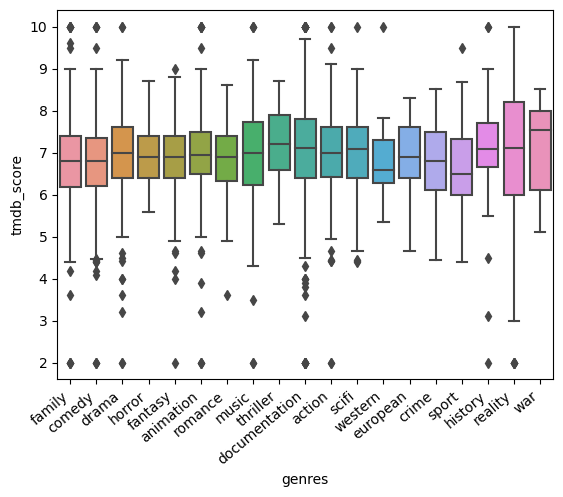

In [294]:
a = sns.boxplot(y = 'tmdb_score', x='genres',data=genre_df4)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

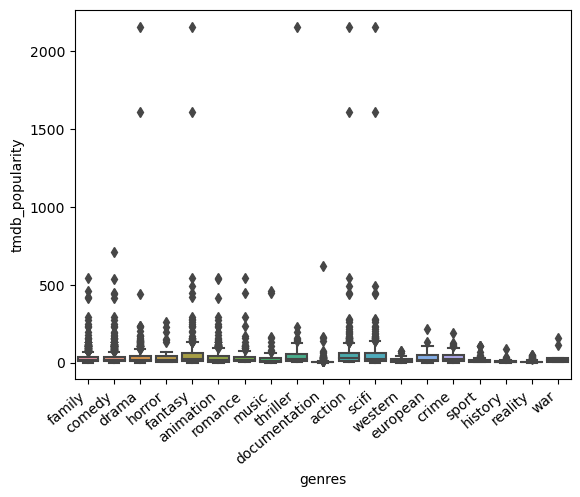

In [295]:
b = sns.boxplot(y = 'tmdb_popularity', x='genres',data=genre_df4)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.show()

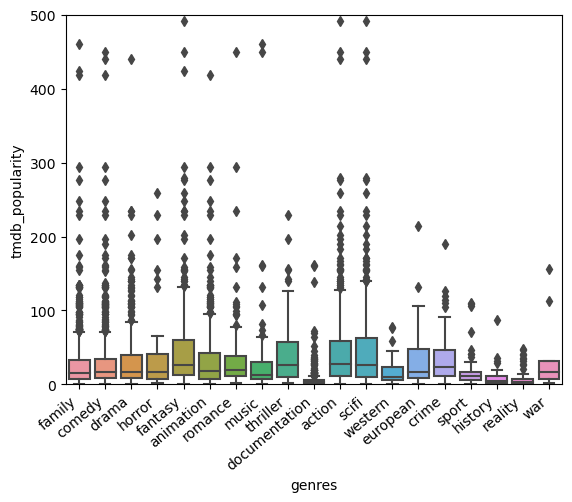

In [296]:
c = sns.boxplot(y = 'tmdb_popularity', x='genres',data=genre_df4)
c.set_xticklabels(c.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 500)
plt.show()

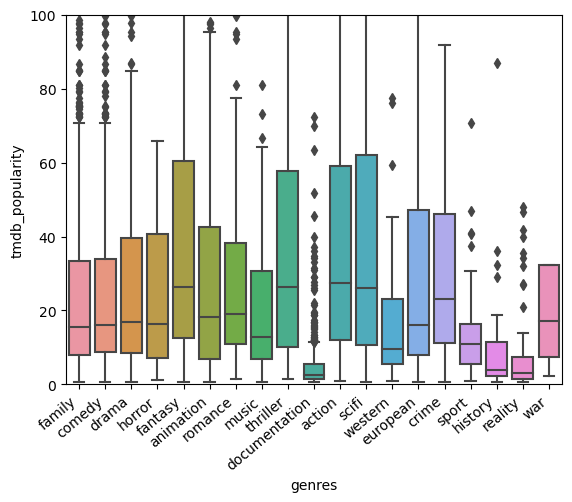

In [297]:
d = sns.boxplot(y = 'tmdb_popularity', x='genres',data=genre_df4)
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 100)
plt.show()

In [ ]:
#rating hist

Text(0.5, 1.0, 'Score Distribution')

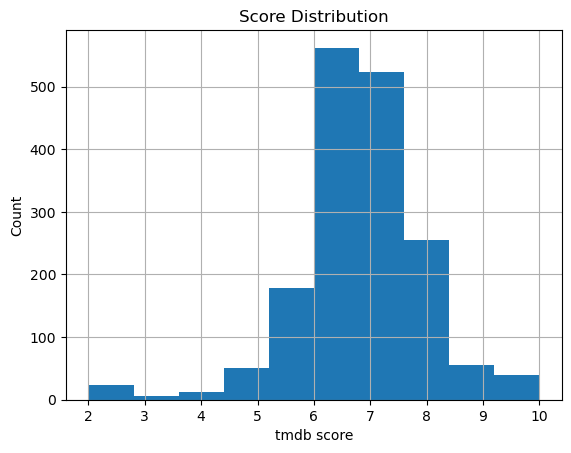

In [288]:
graphs_df['tmdb_score'].hist(bins=10)

# Set title & labels
plt.xlabel("tmdb score")
plt.ylabel("Count")
plt.title("Score Distribution")

Text(0.5, 1.0, 'Popularity Distribution')

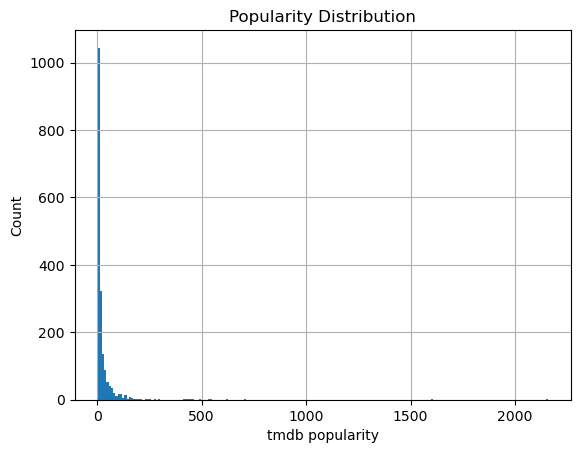

In [289]:
graphs_df['tmdb_popularity'].hist(bins=200)
# Set title & labels
plt.xlabel("tmdb popularity")
plt.ylabel("Count")
plt.title("Popularity Distribution")

In [ ]:
#genre gr

In [ ]:
#pairwise with type

In [ ]:
columns = ["type", 'tmdb_popularity','tmdb_score']
sns.pairplot(graphs_df[columns] , hue="type")

In [ ]:
#noramlize popularity

In [ ]:
#normalize runtime

import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import numpy as np
  
# copy the data
pop_normal = graphs_df.copy()
  
# apply normalization techniques
column = 'tmdb_popularity'
pop_normal[column] = MinMaxScaler().fit_transform(np.array(pop_normal[column]).reshape(-1,1))
  
# view normalized data  
pop_normal.head(2)

In [ ]:
columns = ["type", 'tmdb_popularity','tmdb_score']
sns.pairplot(pop_normal[columns] , hue="type")

In [ ]:
########################################### SANDBOX #######################

In [ ]:
def recommend(title):
    movie_id=data[data.Name==title]["ids"].values[0]
    scores=list(enumerate(sim[movie_id]))
    sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)
    sorted_scores=sorted_scores[1:]
    movies=[data[movies[0]==data["ids"]]["Name"].values[0] for movies in sorted_scores]
    return movies

In [ ]:
#get similar titles in ordered list
def recommend(title):
    movie_id=actors_merged[actors_merged.title == title]['index'].values[0]
    similar_movies = list(enumerate(cosine_sim[movie_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)
    movies=[actors_merged[movies[0]==actors_merged["index"]]["title"].values[0] for movies in sorted_similar_movies]
    return movies
    return id_list

#get 10 most similar titles
def recommend_ten(movie_list):
    first_ten=[]
    count=0
    for movie in movie_list:
        if count > 9:
            break
        count+=1
        first_ten.append(movie)
    return first_ten


  
        


In [ ]:
#get 10 most similar id
def recommend_ten_id(movie_list):
    first_ten=[]
    count=0
    for movie in movie_list:
        if count > 9:
            break
        count+=1
        first_ten.append(movie)
    return first_ten


In [ ]:
#get 15 most similar titles

def get_title_from_index(index):
    return actors_merged[actors_merged.index == index]["title"].values[0]

t=0
similar_movie =[] 
similar_id =[] 
for movie in sorted_similar_movies:
    movie = get_title_from_index(movie[0])
    similar_movie.append(movie)
    t=t+1
    if t>15:
        break


In [ ]:
def recommend_ten(movie_list):
    first_ten=[]
    count=0
    for movie in movie_list:
        if count > 9:
            break
        count+=1
        first_ten.append(movie)
    return first_ten

In [ ]:
recommend('Toy Story')